#### Useful Python packages

Below is a list of Python packages you might find useful:
- [Matplotlib](???) :
- [Numpy](???) :
- [SciPy](???) :
- [Seaborn](???) : 
- [sdeint](???) :

In [25]:
# --> Import standard python packages.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

########################################
# If you get LaTeX errors when running the notebook, erase the following lines and restart the python kernel.

scale = 2
params = {'text.usetex' : True,
          'font.size' : 8*scale,
          'text.latex.unicode' : True}
plt.rcParams.update(params)
#########################################

fig_width = 5.33*scale # Standard figure with for J. Fluid Mech.

# Stochastic ain't chaotic

The aim of this project is to study the long-time behaviour of a dynamical system under white noise excitation. For that purpose, there are three different approaches you can use:
- Fokker Planck equation,
- Monte-Carlo simulations,
- Cumulant equations.

It is strongly suggested that you use at least two of these methods and compare their pros and cons. The rest of this notebook is dedicated to illustrating how to setup a stochastic simulation of the following system

$$
    \dot{x} = rx - x^3 + \gamma \eta
$$

with $x \in \mathbb{R}$ being the state of the system, while the external white noise excitation $\eta$ has covariance $\gamma$.

### Deterministic case

Let us first consider the noiseless case (i.e. $\gamma=0$). The equation we aim to solve is thus

$$
    \dot{x} = rx - x^3
$$

with initial condition $x(0) = x_0$ and $r=10^{-6}$ for instance. The following cells illustrate how to solve this problem using standard Python tools.

In [26]:
# --> Import ODESolver from scipy.integrate
from scipy.integrate import solve_ivp

# --> Define the parameters of the problem.
r = 0.1     # Control parameter.
x0 = np.array([1e-6])   # Initial condition.
tspan = (0.0, 500.0)     # Integrate from t=0 up to t=500

# --> Create the python function for the right-hand side.
f = lambda t, x : r*x - x**3

# --> Solve the problem.
output = solve_ivp(f, tspan, x0, dense_output=True)

Text(0,0.5,'$x(t)$')

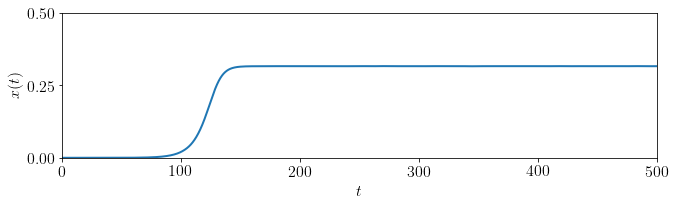

In [27]:
# --> Extract features from output.
sol = output.sol

# --> Evaluate solution at various times.
t = np.linspace(tspan[0], tspan[1], 50001)
y = sol(t).T

# --> Plot figure.
fig = plt.figure( figsize = (fig_width, fig_width/4) )
ax = fig.gca()

ax.plot(
    t, y,
    linewidth = 2,)

ax.set_xlim(tspan[0], tspan[1])
ax.locator_params(axis="x", nbins=5)
ax.set_xlabel(r"$t$")

ax.set_ylim(0, 0.5)
ax.set_yticks([0, 0.25, 0.5])
ax.set_ylabel(r"$x(t)$")

There are a lot of different options you can tweak to make the figure looks nicer (although this is essentially personal taste). For more details, you can look at the different tutorials and the documentation from [Matplotlib](???).

### Stochastic simulation

Let us now reconsider our original stochastically-forced dynamical system and let see how to implement in Python. For that purpose, we will use a recent python pacakge [sdeint](https://github.com/mattja/sdeint).

In [64]:
# --> Import SDEINT.
from sdeint import *

# --> Define the deterministic component.
def f(x, t):
    return r*x - x**3

# --> Define the stochastic component.
gamma = 0.05*np.ones((1, 1))
def g(x, t):
    return gamma

# --> Setup and solve the stochastic differential equation.
t = np.linspace(0, 10000, 100001)

output = itoint(f, g, x0, t)
output_bis = itoint(f, g, x0, t)

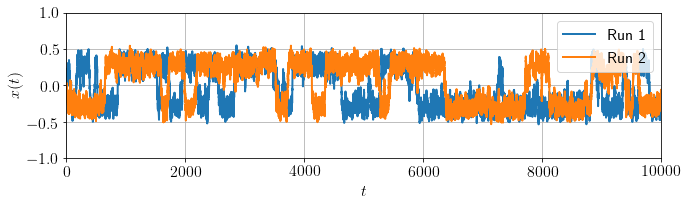

In [65]:
# --> Plot figure.
fig = plt.figure( figsize=(fig_width, fig_width/4) )
ax = fig.gca()

# --> Plot run 1.
ax.plot(
        t, output,
        linewidth = 2,
        label = r"Run 1",
)

# --> Plot run 2.
ax.plot(
        t, output_bis,
        linewidth = 2,
        label = r"Run 2",
)

# --> Decorate figure.
ax.set_xlim(t[0], t[-1])
ax.set_xlabel(r"$t$")

ax.set_ylim(-1, 1)
ax.set_ylabel(r"$x(t)$")

ax.grid(True)

ax.legend(loc="upper right")

Text(0.5,1,'Run 2')

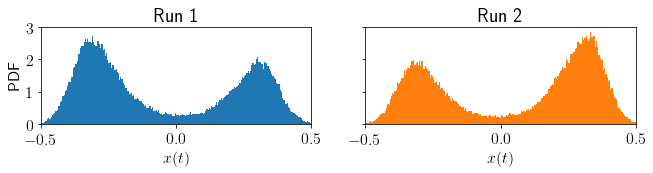

In [66]:
# --> Plot histogram.
fig, axes = plt.subplots(1, 2, figsize = (fig_width, fig_width/6), sharex=True, sharey=True)

# --> Run 1.
ax = axes[0]
ax.hist(output, bins=250, density=True);

ax.set_xlim(-0.5, 0.5)
ax.set_xlabel(r"$x(t)$")

ax.set_ylim(0, 3)
ax.set_ylabel(r"PDF")

ax.locator_params(axis="both", nbins=3)

ax.set_title("Run 1")


# --> Run 2.
ax = axes[1]
ax.hist(output_bis, bins=250, density=True, color="#ff7f0e");

ax.set_xlabel(r"$x(t)$")

ax.set_title("Run 2")

# Project

The equation you'll be working with during this project is the following

$$
    \dot{x} = \mu x + x^3 - \alpha x^5 + \gamma \eta.
$$

with $x \in \mathbb{R}$ being the state of the system at time $t$ while $\mu$ and $\alpha$ are real-valued control parameters (with $\alpha > 0$). Finally, $\gamma$ is the variance of the external white noise $\eta$ driving the system. Such a stochastic dynamical system is an extreme simplification of the problem of subcritical transition to turbulence in fluid dynamics. It nonetheless exhibits some of the key aspects of this fundamental problem.

Below is a non-exhaustive list of investigations you can do for this project:
- Fully characterize the dynamics and bifurcation diagram of the deterministic system as you vary the control parameter $\mu$ and the strength $\alpha$ of the quintic nonlinearity.
- Investigate the dynamics of the system under white noise excitation in the region of the parameter space for which 5 fixed points co-exist. Depending on the amplitude of the white noise excitation, how does the residence time around each fixed point evolve?
- For a given amplitude of the white noise excitation, how does the probability density function of the system evolves as $\mu$ varies? (e.g. bifurcation diagram of the PDF itself).
- What if you change from white noise excitation to colored noise?
- Any other idea you might think of.